## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_results_new = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
study_results_new.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
print(len(study_results_new['Mouse ID'].unique()))

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_results_new[study_results_new.duplicated(subset=['Mouse ID','Timepoint'])]['Mouse ID']

861    g989
863    g989
865    g989
867    g989
869    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
study_results_new[study_results_new.duplicated(subset=['Mouse ID','Timepoint'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_results_new_1 = study_results_new[study_results_new['Mouse ID']!='g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(study_results_new_1['Mouse ID'].unique()))

248


## Summary Statistics

In [7]:
from scipy.stats import sem

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
df_mean = study_results_new_1.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
df_mean = df_mean.to_frame()
df_mean.reset_index(inplace=True)
col = ['Drug Regimen','mean']
df_mean.columns=col

df_median = study_results_new_1.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
df_median = df_median.to_frame()
df_median.reset_index(inplace=True)
col = ['Drug Regimen','median']
df_median.columns=col

df_std = study_results_new_1.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
df_std = df_std.to_frame()
df_std.reset_index(inplace=True)
col = ['Drug Regimen','std']
df_std.columns=col

df_var = study_results_new_1.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
df_var = df_var.to_frame()
df_var.reset_index(inplace=True)
col = ['Drug Regimen','var']
df_var.columns=col

df_sem = study_results_new_1.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
df_sem = df_sem.to_frame()
df_sem.reset_index(inplace=True)
col = ['Drug Regimen','sem']
df_sem.columns=col

statistics = pd.merge(df_mean, df_median)
statistics = pd.merge(statistics, df_std)
statistics = pd.merge(statistics, df_var)
statistics = pd.merge(statistics, df_sem)

print(statistics)

  Drug Regimen       mean     median       std        var       sem
0    Capomulin  40.675741  41.557809  4.994774  24.947764  0.329346
1     Ceftamin  52.591172  51.776157  6.268188  39.290177  0.469821
2    Infubinol  52.884795  51.820584  6.567243  43.128684  0.492236
3     Ketapril  55.235638  53.698743  8.279709  68.553577  0.603860
4     Naftisol  54.331565  52.509285  8.134708  66.173479  0.596466
5      Placebo  54.033581  52.288934  7.821003  61.168083  0.581331
6     Propriva  52.320930  50.446266  6.622085  43.852013  0.544332
7     Ramicane  40.216745  40.673236  4.846308  23.486704  0.320955
8     Stelasyn  54.233149  52.431737  7.710419  59.450562  0.573111
9    Zoniferol  53.236507  51.818479  6.966589  48.533355  0.516398


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
print(study_results_new_1.groupby(['Drug Regimen']).agg({ 'Tumor Volume (mm3)':['mean', 'median','std','var','sem']}))

             Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398


## Bar and Pie Charts

Text(0, 0.5, 'count')

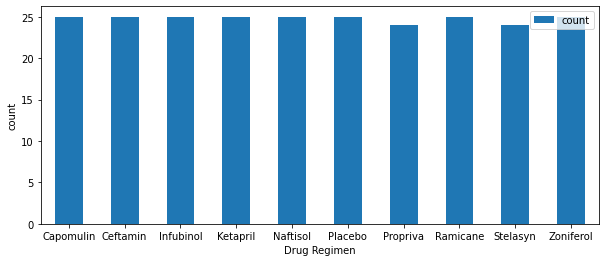

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_metadata_new = study_results_new_1[['Mouse ID','Drug Regimen']].drop_duplicates()
count = mouse_metadata_new.groupby(['Drug Regimen'])['Mouse ID'].count()
count = count.to_frame()
count.reset_index(inplace=True)
col = ['Drug Regimen','count']
count.columns=col
ax = count.plot('Drug Regimen','count',kind='bar',figsize=(10,4),rot=0)
ax.set_ylabel('count')

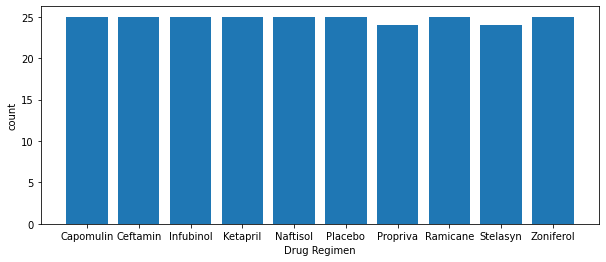

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.bar(count['Drug Regimen'], count['count'])
plt.xlabel('Drug Regimen')
plt.ylabel('count')
plt.show()

<AxesSubplot:ylabel='count'>

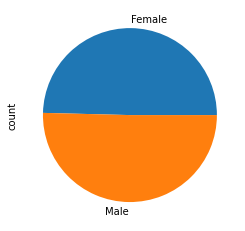

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_metadata_new_1 = study_results_new_1[['Mouse ID','Sex']].drop_duplicates()
distribution = mouse_metadata_new_1.groupby(['Sex'])['Mouse ID'].count()
distribution = distribution.to_frame()
col = ['count']
distribution.columns=col
distribution.plot(y = 'count',kind='pie',legend=False)

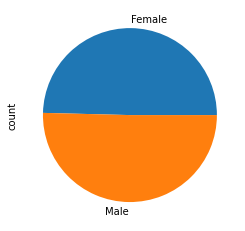

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.pie(distribution['count'], labels=['Female', 'Male'])
plt.ylabel('count')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
study_results_new_2 = study_results_new_1[(study_results_new_1['Drug Regimen']=='Capomulin')|(study_results_new_1['Drug Regimen']=='Ramicane')|(study_results_new_1['Drug Regimen']=='Infubinol')|(study_results_new_1['Drug Regimen']=='Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse
timepoint_max = study_results_new_2.groupby('Mouse ID')['Timepoint'].max()
timepoint_max = timepoint_max.to_frame()
timepoint_max.reset_index(inplace=True)
col = ['Mouse ID','Timepoint_max']
timepoint_max.columns=col

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_final = pd.merge(timepoint_max,study_results_new_2,left_on=['Mouse ID','Timepoint_max'],right_on=['Mouse ID','Timepoint'])
tumor_volume_final

,Mouse ID,Timepoint_max,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...,...
95,y769,45,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,45,30.638696,0,Ramicane,Male,11,16


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    temp = tumor_volume_final[tumor_volume_final['Drug Regimen']==treatment]
    q1 = temp["Tumor Volume (mm3)"].quantile(0.25)
    q3 = temp["Tumor Volume (mm3)"].quantile(0.75)
    iqr = q3 - q1
    # Determine outliers using upper and lower bounds
    bottom = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    final = temp[(temp["Tumor Volume (mm3)"] >= bottom) & (temp["Tumor Volume (mm3)"] <= upper)]
    tumor_vol.append(list(final['Tumor Volume (mm3)']))

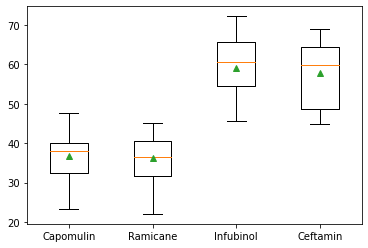

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.boxplot(tumor_vol, labels=['Capomulin','Ramicane','Infubinol','Ceftamin'], sym="r+", showmeans=True)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

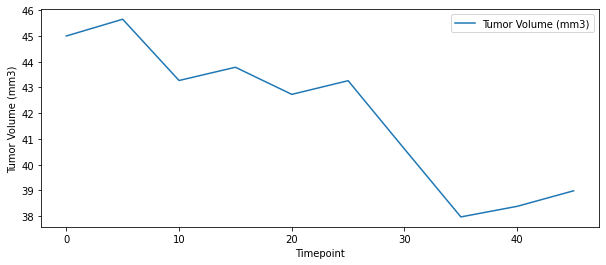

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plot_test = study_results_new_1[study_results_new_1['Mouse ID']=='b128']
ax1 = plot_test.plot('Timepoint','Tumor Volume (mm3)',kind='line',figsize=(10,4))
ax1.set_ylabel('Tumor Volume (mm3)')

<AxesSubplot:xlabel='Weight (g)', ylabel='volume_mean'>

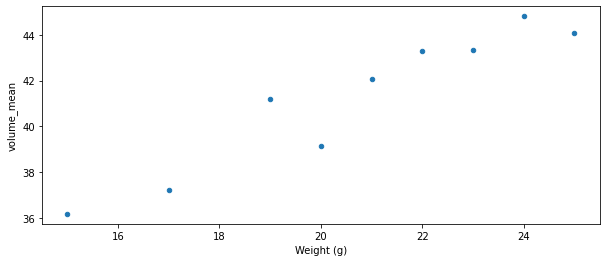

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plot_test_1 = study_results_new_1[study_results_new_1['Drug Regimen']=='Capomulin']
volume_avg = plot_test_1.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()
volume_avg = volume_avg.to_frame()
volume_avg.reset_index(inplace=True)
col = ['Weight (g)','volume_mean']
volume_avg.columns=col
volume_avg.plot('Weight (g)','volume_mean',kind='scatter',figsize=(10,4))

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print('coefficient')
print(volume_avg.corr())

import statsmodels.api as sm
x = sm.add_constant(volume_avg['Weight (g)']) 
y = volume_avg['volume_mean'] 
model = sm.OLS(y.astype(float), x.astype(float)) 
result = model.fit() 
print('------------------------------------------------------')
print('linear regression')
print(result.summary()) 

coefficient
             Weight (g)  volume_mean
Weight (g)     1.000000     0.950524
volume_mean    0.950524     1.000000
------------------------------------------------------
linear regression
                            OLS Regression Results                            
Dep. Variable:            volume_mean   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     65.54
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           8.45e-05
Time:                        02:39:28   Log-Likelihood:                -11.862
No. Observations:                   9   AIC:                             27.72
Df Residuals:                       7   BIC:                             28.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
              

c:\Users\godlo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
c:\Users\godlo\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
